# 使用iris数据集的PCA demo: princomp(), prcomp()

PCA 对列进行简化，所以表达矩阵要转置，一列一个基因，一行一个细胞。
  - 本例使用iris数据集，其一行就是一个观测值(类比细胞)，一列是一个属性(类比基因)，相当于常用的表达矩阵转置过的。
  - 自带标签，便于可视化分类效果。
  - 每个观察值归一化到1之后，分类效果略有差异，整体和归一化前一致。

prcomp()能处理行(细胞)比列(基因)少的情况，所以一般选择该函数。

## 1. princomp

In [1]:
test=iris[,1:4]

test.pr<-princomp(test,cor=TRUE)
test.pr

Call:
princomp(x = test, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.7083611 0.9560494 0.3830886 0.1439265 

 4  variables and  150 observations.

In [2]:
summary(test.pr,loadings=TRUE)  #loading是逻辑变量，当 loading=TRUE 时表示显示 loading 的内容

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4
Standard deviation     1.7083611 0.9560494 0.38308860 0.143926497
Proportion of Variance 0.7296245 0.2285076 0.03668922 0.005178709
Cumulative Proportion  0.7296245 0.9581321 0.99482129 1.000000000

Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4
Sepal.Length  0.521  0.377  0.720  0.261
Sepal.Width  -0.269  0.923 -0.244 -0.124
Petal.Length  0.580        -0.142 -0.801
Petal.Width   0.565        -0.634  0.524

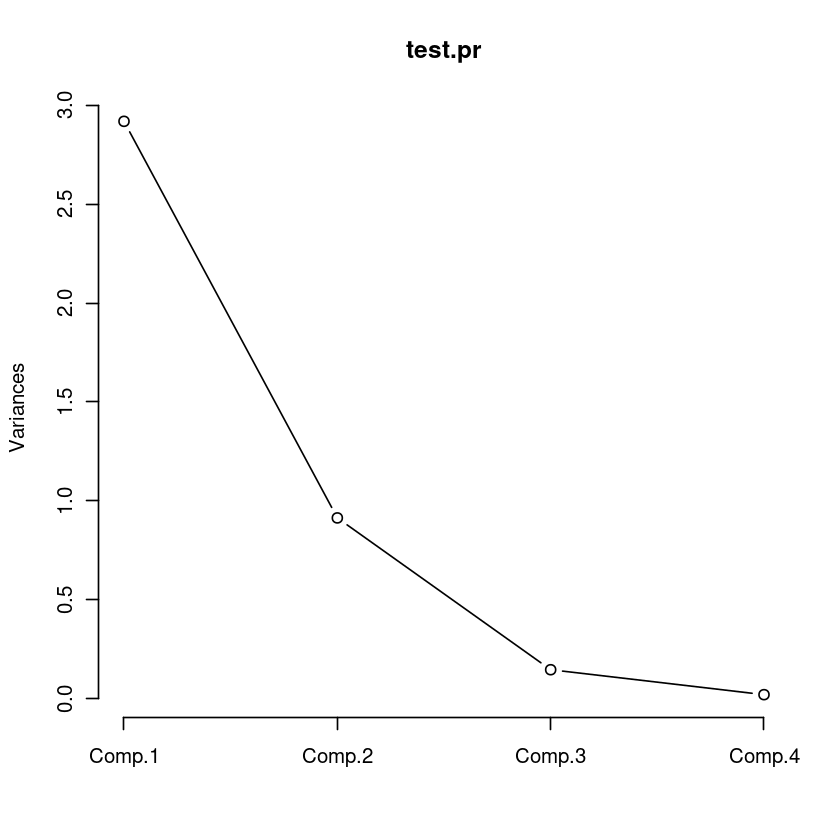

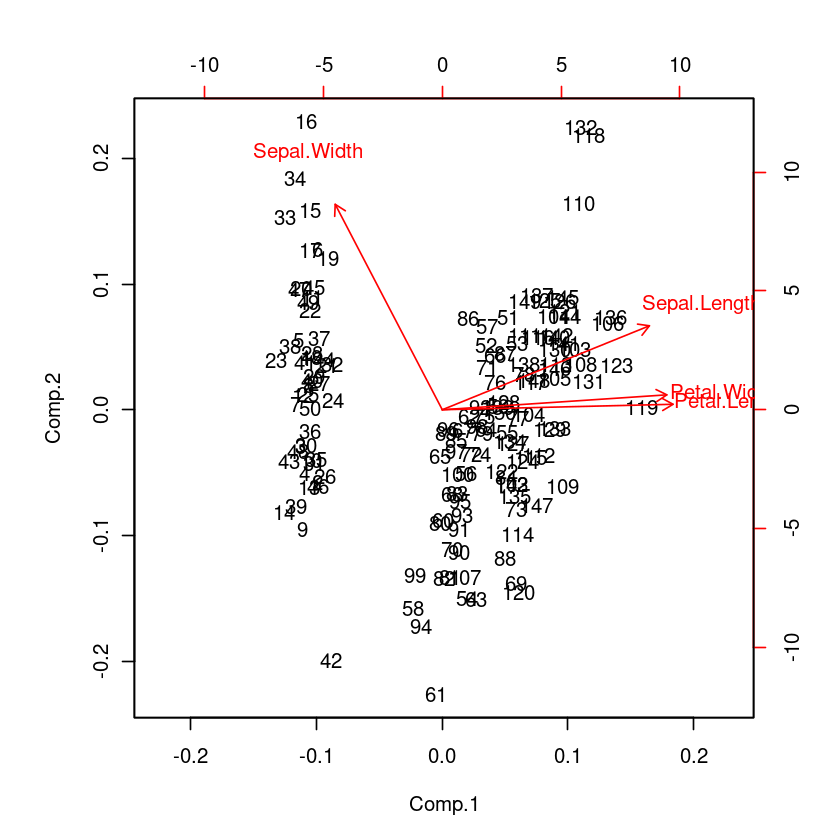

In [3]:
screeplot(test.pr,type="lines")

p <- predict(test.pr) 

biplot(test.pr)  #画出数据关于主成分的散点图和原坐标在主成分下的方向

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



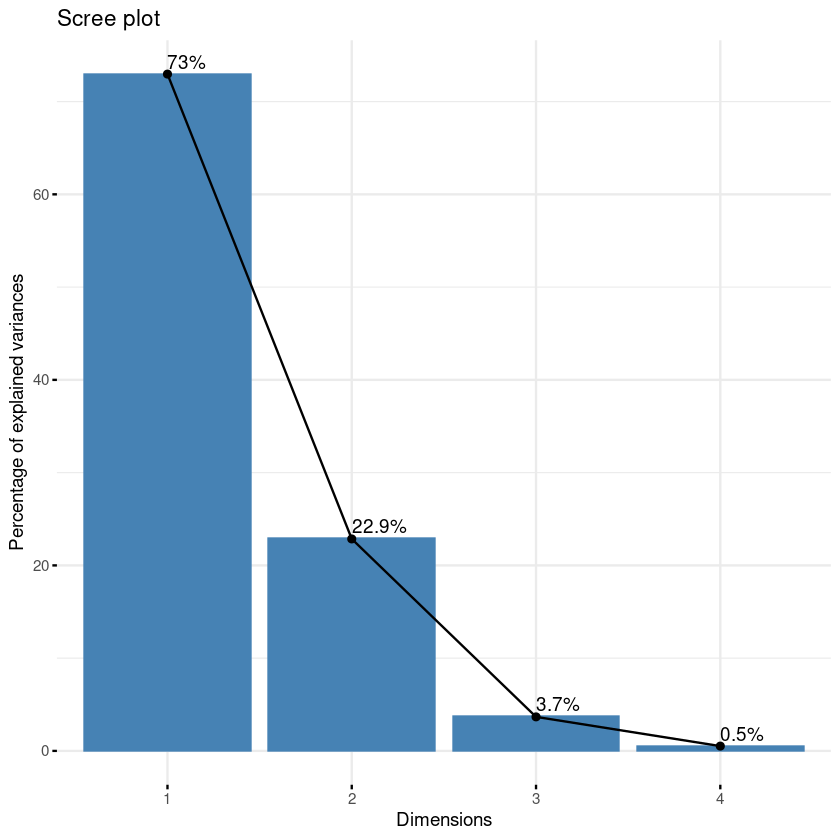

In [4]:
# 每个PC占了多少比例
library(factoextra)
fviz_eig(test.pr, addlabels = TRUE)

In [5]:
res.pca=test.pr
var <- get_pca_ind(res.pca)
var

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [6]:
head(iris) #使用PCA，筛选哪些列是重要的

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [7]:
head(p)

Comp.1,Comp.2,Comp.3,Comp.4
-2.264703,0.4800266,0.12770602,0.02416820
-2.080961,-0.6741336,0.23460885,0.10300677
-2.364229,-0.3419080,-0.04420148,0.02837705
-2.299384,-0.5973945,-0.09129011,-0.06595556
-2.389842,0.6468354,-0.01573820,-0.03592281
-2.075631,1.4891775,-0.02696829,0.00660818


In [8]:
df=as.data.frame(var$coord)
df$type=iris[,5]
head(df)

,Dim.1,Dim.2,Dim.3,Dim.4,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-2.264703,0.4800266,0.12770602,0.02416820,setosa
2,-2.080961,-0.6741336,0.23460885,0.10300677,setosa
3,-2.364229,-0.3419080,-0.04420148,0.02837705,setosa
4,-2.299384,-0.5973945,-0.09129011,-0.06595556,setosa
5,-2.389842,0.6468354,-0.01573820,-0.03592281,setosa
6,-2.075631,1.4891775,-0.02696829,0.00660818,setosa


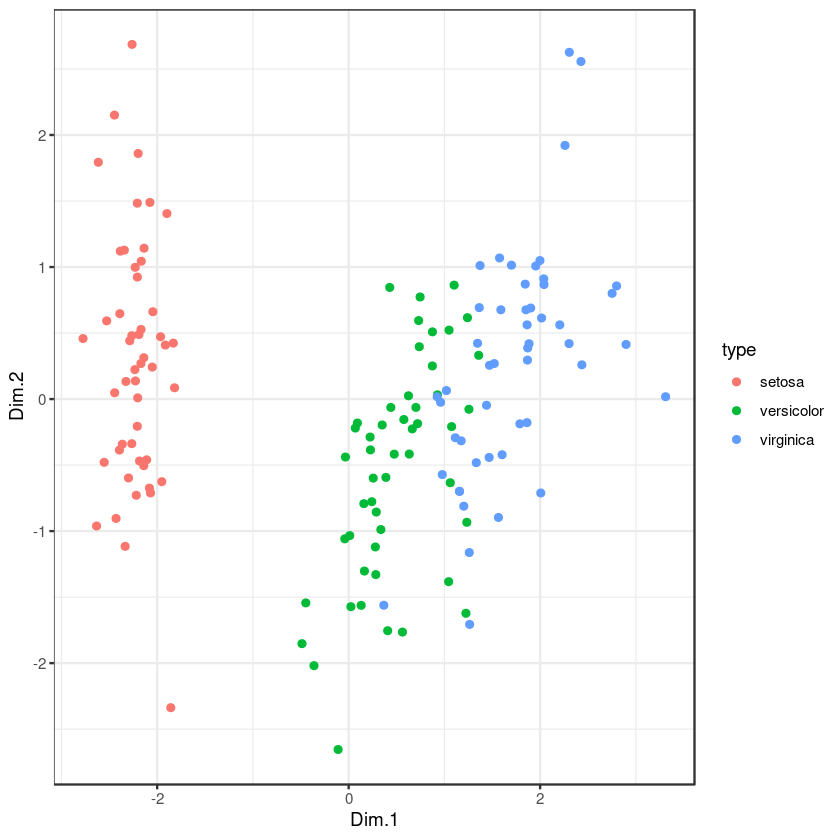

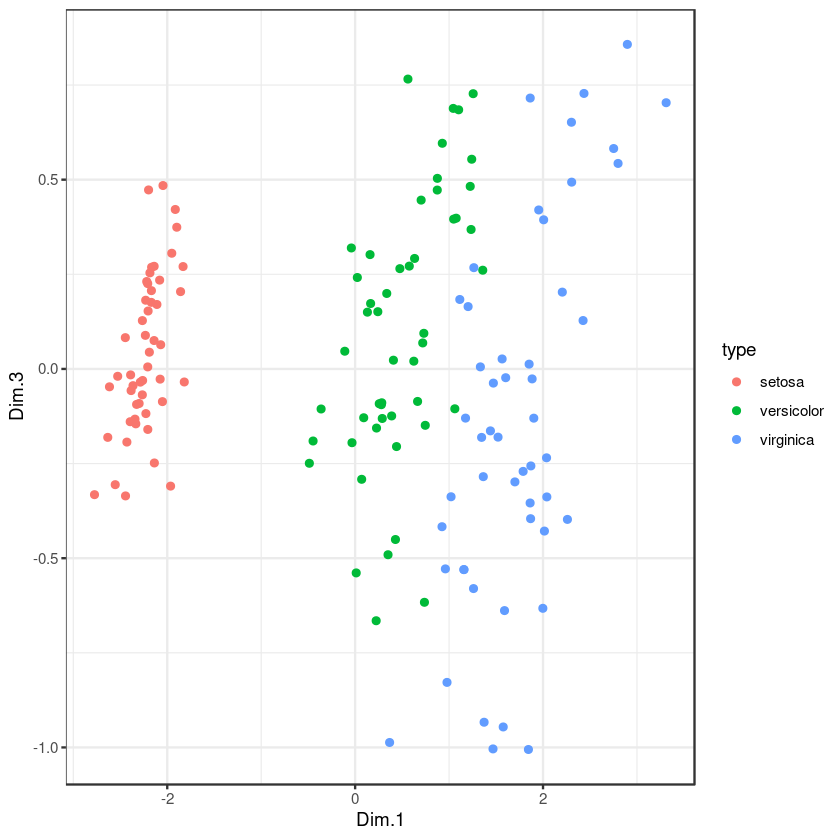

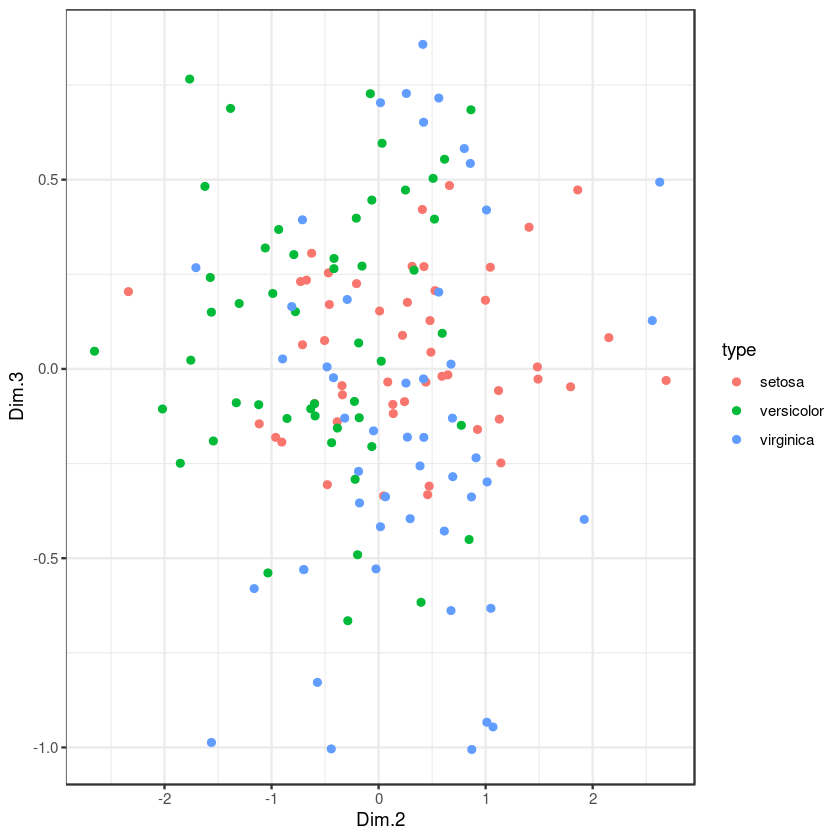

In [9]:
library(ggplot2)
ggplot(df, aes(Dim.1, Dim.2, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.1, Dim.3, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.2, Dim.3, color=type) )+geom_point() + theme_bw()

## 2. prcomp

In [10]:
test.pca<-prcomp(test) 
test.pca

Standard deviations (1, .., p=4):
[1] 2.0562689 0.4926162 0.2796596 0.1543862

Rotation (n x k) = (4 x 4):
                     PC1         PC2         PC3        PC4
Sepal.Length  0.36138659 -0.65658877  0.58202985  0.3154872
Sepal.Width  -0.08452251 -0.73016143 -0.59791083 -0.3197231
Petal.Length  0.85667061  0.17337266 -0.07623608 -0.4798390
Petal.Width   0.35828920  0.07548102 -0.54583143  0.7536574

In [11]:
test.pca$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.36138659,-0.65658877,0.58202985,0.3154872
Sepal.Width,-0.08452251,-0.73016143,-0.59791083,-0.3197231
Petal.Length,0.85667061,0.17337266,-0.07623608,-0.4798390
Petal.Width,0.35828920,0.07548102,-0.54583143,0.7536574


PC1,PC2,PC3,PC4
-2.684126,-0.3193972,0.02791483,0.002262437
-2.714142,0.1770012,0.21046427,0.099026550
-2.888991,0.1449494,-0.01790026,0.019968390
-2.745343,0.3182990,-0.03155937,-0.075575817
-2.728717,-0.3267545,-0.09007924,-0.061258593
-2.280860,-0.7413304,-0.16867766,-0.024200858


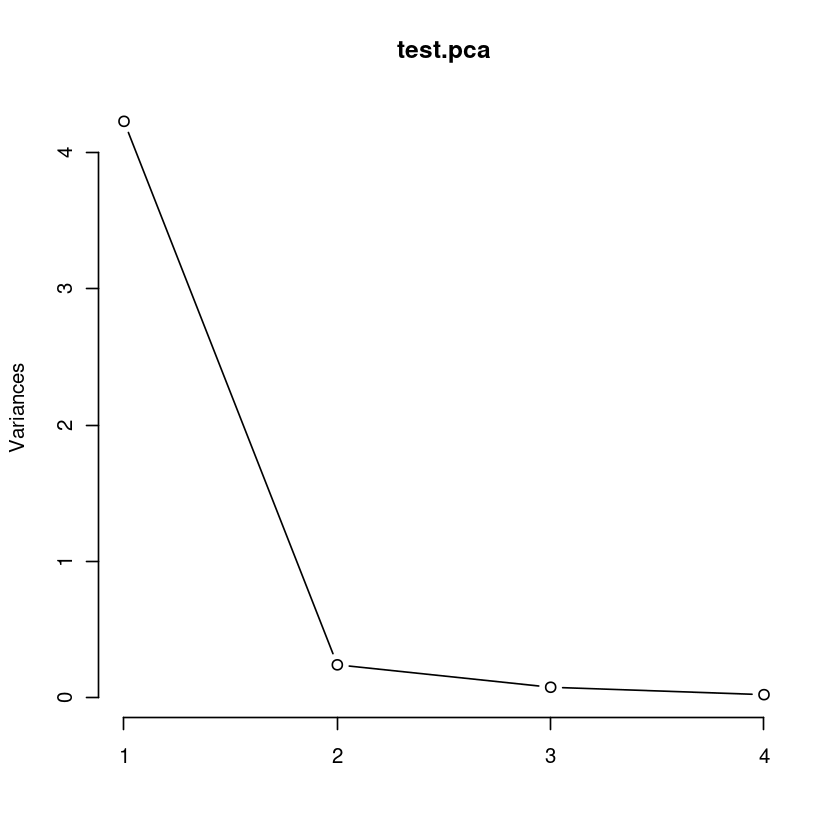

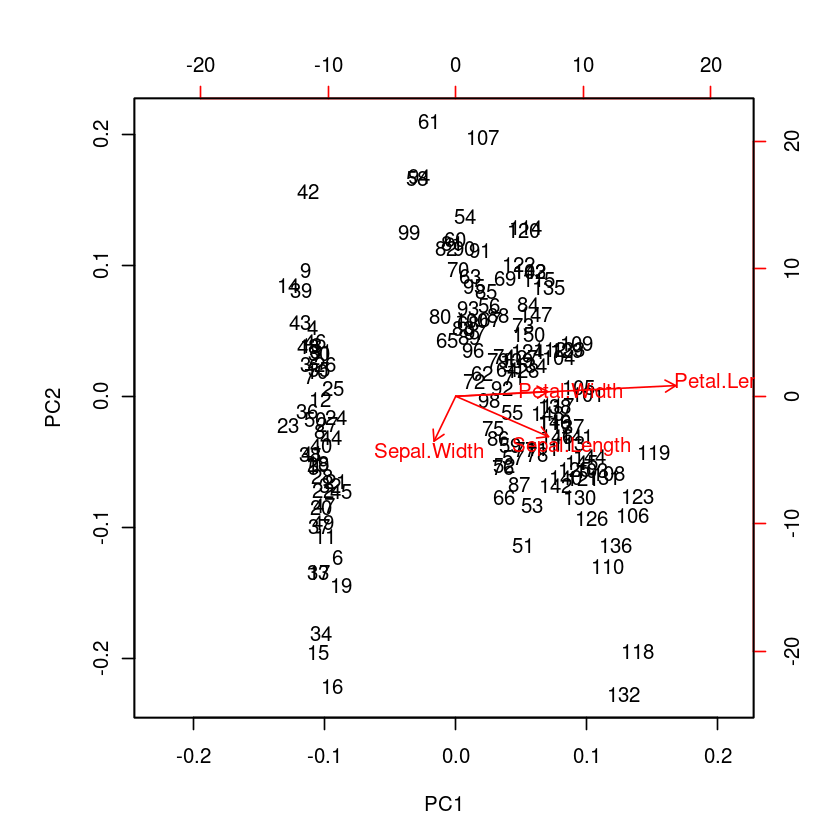

In [12]:
screeplot(test.pca,type="lines")
p <- predict(test.pca) # 就是每行的结果
head(p)

biplot(test.pca)  #画出数据关于主成分的散点图和原坐标在主成分下的方向

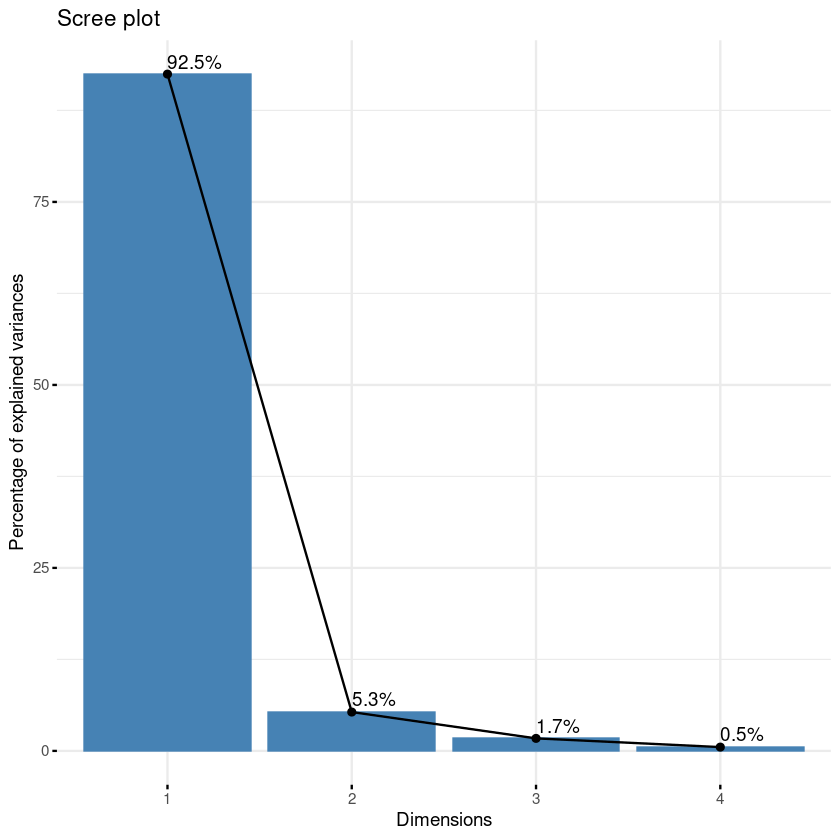

In [13]:
# 每个PC占了多少比例
library(factoextra)
fviz_eig(test.pca, addlabels = TRUE)

In [14]:
# 查看每个PC的坐标
res.pca2=test.pca
#var <- get_pca_var(res.pca2)
ind <- get_pca_ind(res.pca2) #这是看观察值，也就是行。
head(ind$coord) 

,Dim.1,Dim.2,Dim.3,Dim.4
1,-2.684126,-0.3193972,0.02791483,0.002262437
2,-2.714142,0.1770012,0.21046427,0.099026550
3,-2.888991,0.1449494,-0.01790026,0.019968390
4,-2.745343,0.3182990,-0.03155937,-0.075575817
5,-2.728717,-0.3267545,-0.09007924,-0.061258593
6,-2.280860,-0.7413304,-0.16867766,-0.024200858


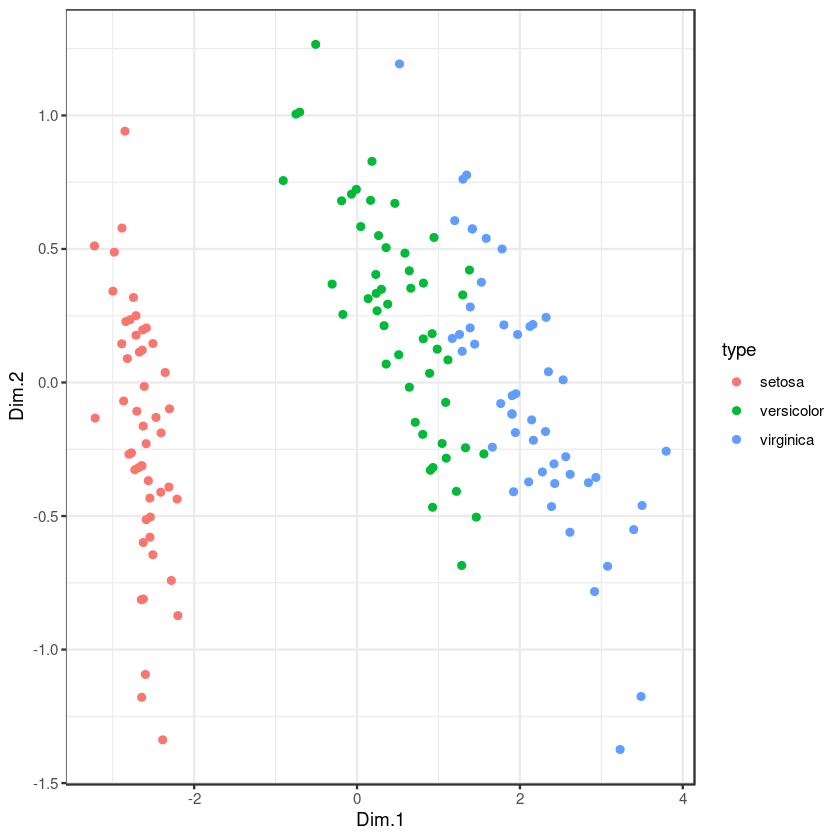

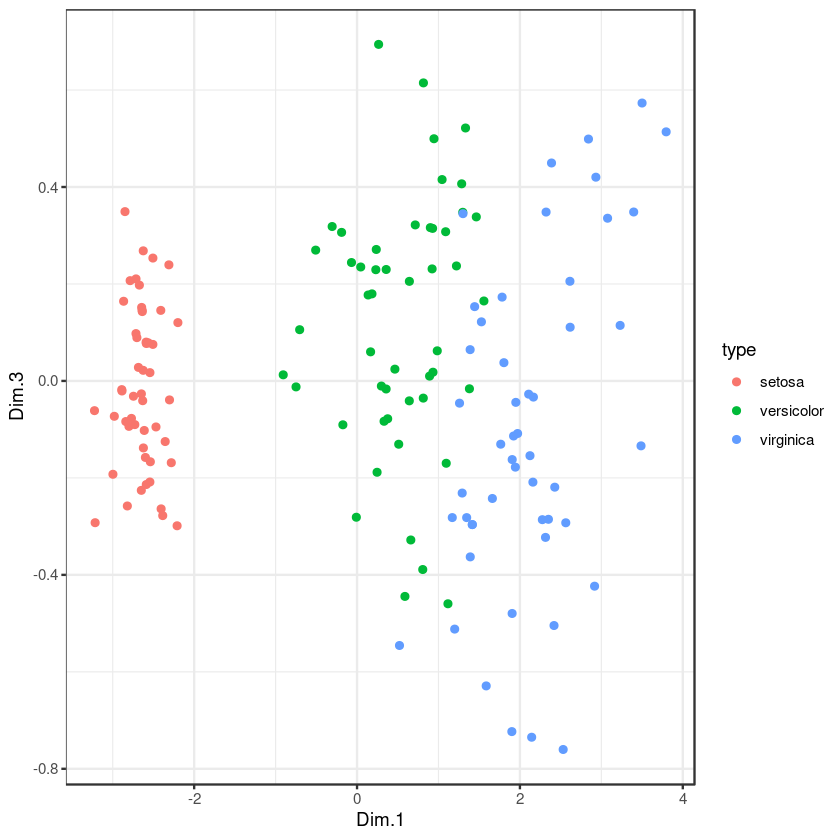

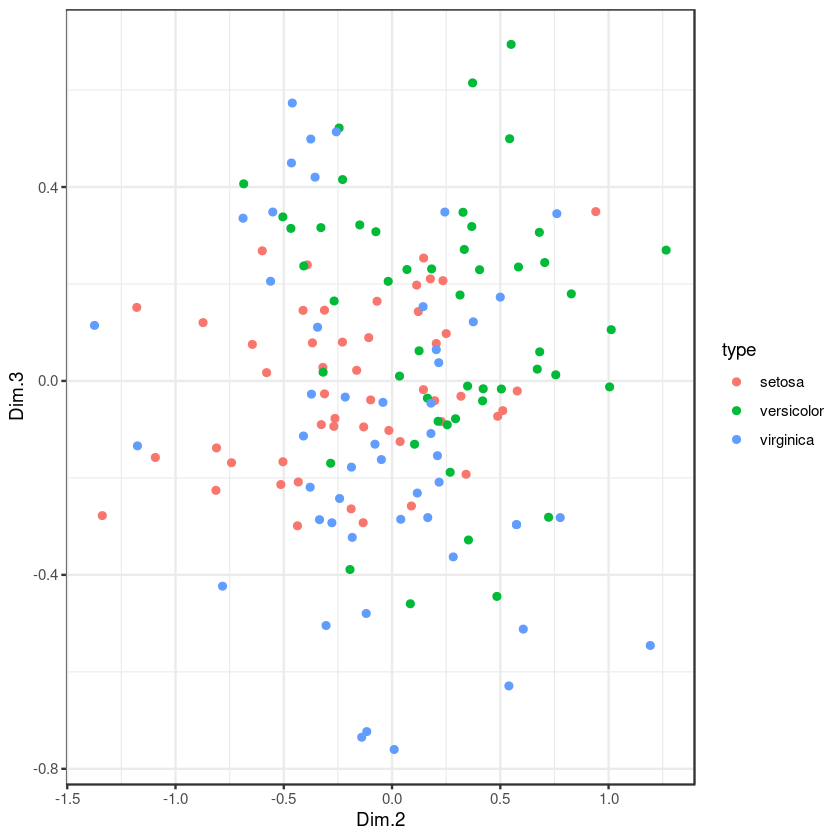

In [15]:
# 画出每个点的位置，使用前几个PC
library(ggplot2)

df=as.data.frame(ind$coord)
df$type=iris[,5]

ggplot(df, aes(Dim.1, Dim.2, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.1, Dim.3, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.2, Dim.3, color=type) )+geom_point() + theme_bw()

## 2.2 对列做标准化后呢？整体分类效果差别不大

In [16]:
head(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [17]:
#一个观测值(一行)归一化为1.
test2=as.data.frame( t( apply(iris[,1:4], 1, function(x){x/sum(x)}) ) )
row.names(test2)=rownames(test)
head(test2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5000000,0.3431373,0.1372549,0.01960784
2,0.5157895,0.3157895,0.1473684,0.02105263
3,0.5000000,0.3404255,0.1382979,0.02127660
4,0.4893617,0.3297872,0.1595745,0.02127660
5,0.4901961,0.3529412,0.1372549,0.01960784
6,0.4736842,0.3421053,0.1491228,0.03508772


In [18]:
test2.pca<-prcomp(test2) 
test2.pca

Standard deviations (1, .., p=4):
[1] 1.250184e-01 2.146269e-02 1.106389e-02 3.014346e-17

Rotation (n x k) = (4 x 4):
                    PC1        PC2        PC3 PC4
Sepal.Length -0.3697552  0.7581222  0.1962952 0.5
Sepal.Width  -0.5908625 -0.5271253 -0.3507427 0.5
Petal.Length  0.6427426  0.1301739 -0.5656295 0.5
Petal.Width   0.3178751 -0.3611709  0.7200771 0.5

,PC1,PC2,PC3,PC4
1,-0.1837709,0.0008270327,6.077734e-05,1.132725e-17
2,-0.1664907,0.0280077911,8.072064e-03,1.383427e-17
3,-0.1809678,0.0017895131,1.623590e-03,3.276739e-18
4,-0.1570731,0.0021017565,-8.768021e-03,-4.876497e-17
5,-0.1859386,-0.0117734330,-5.302339e-03,3.908282e-17
6,-0.1608820,-0.0226255518,-3.090542e-04,1.142392e-17


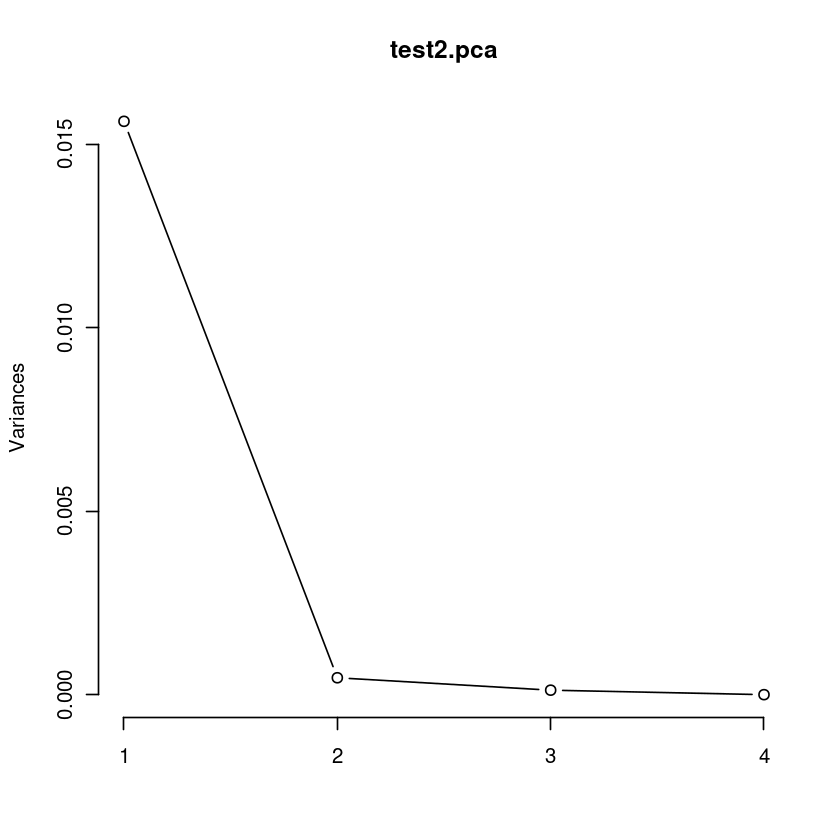

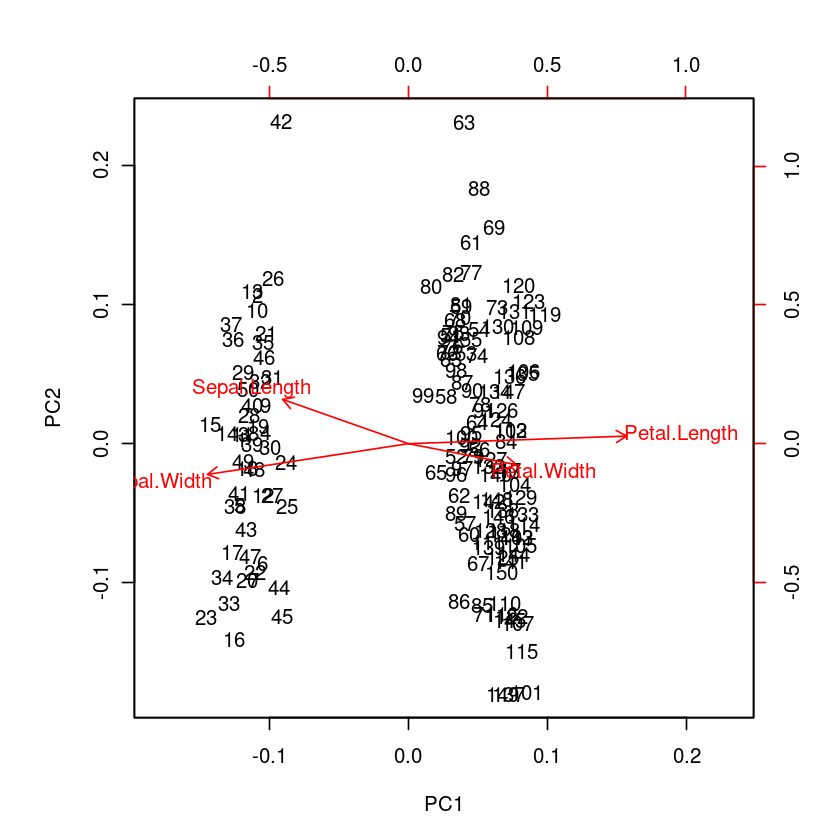

In [19]:
screeplot(test2.pca,type="lines")
p2 <- predict(test2.pca) # 就是每行的结果
head(p2)

biplot(test2.pca)  #画出数据关于主成分的散点图和原坐标在主成分下的方向

In [20]:
# 查看每个PC的坐标
res.pca3=test2.pca
#var <- get_pca_var(res.pca2)
ind3 <- get_pca_ind(res.pca3) #这是看观察值，也就是行。
head(ind3$coord) 

,Dim.1,Dim.2,Dim.3,Dim.4
1,-0.1837709,0.0008270327,6.077734e-05,1.132725e-17
2,-0.1664907,0.0280077911,8.072064e-03,1.383427e-17
3,-0.1809678,0.0017895131,1.623590e-03,3.276739e-18
4,-0.1570731,0.0021017565,-8.768021e-03,-4.876497e-17
5,-0.1859386,-0.0117734330,-5.302339e-03,3.908282e-17
6,-0.1608820,-0.0226255518,-3.090542e-04,1.142392e-17


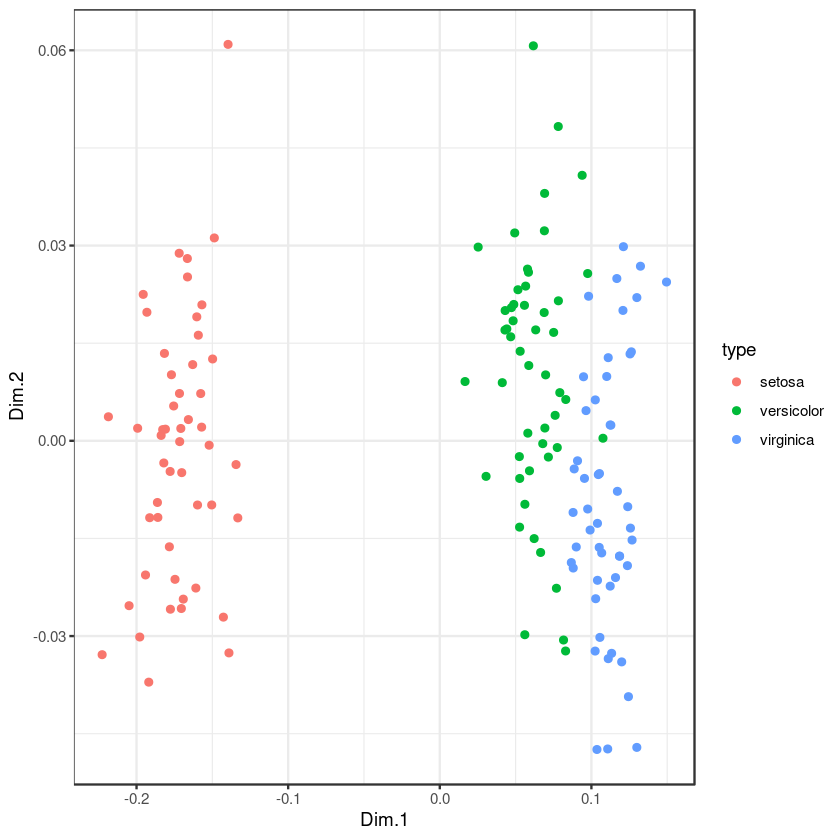

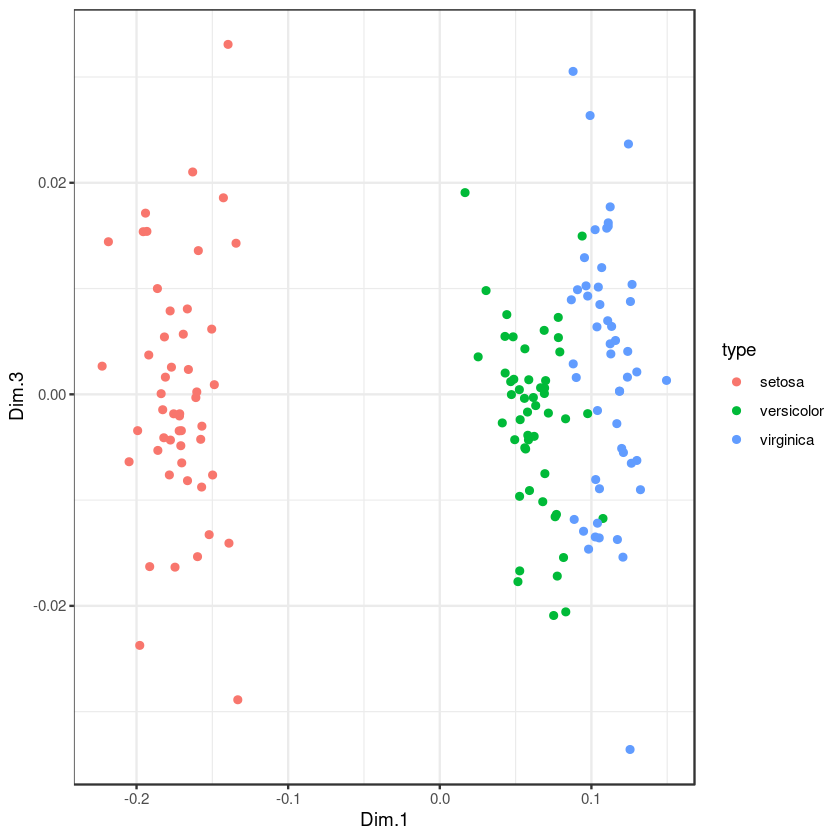

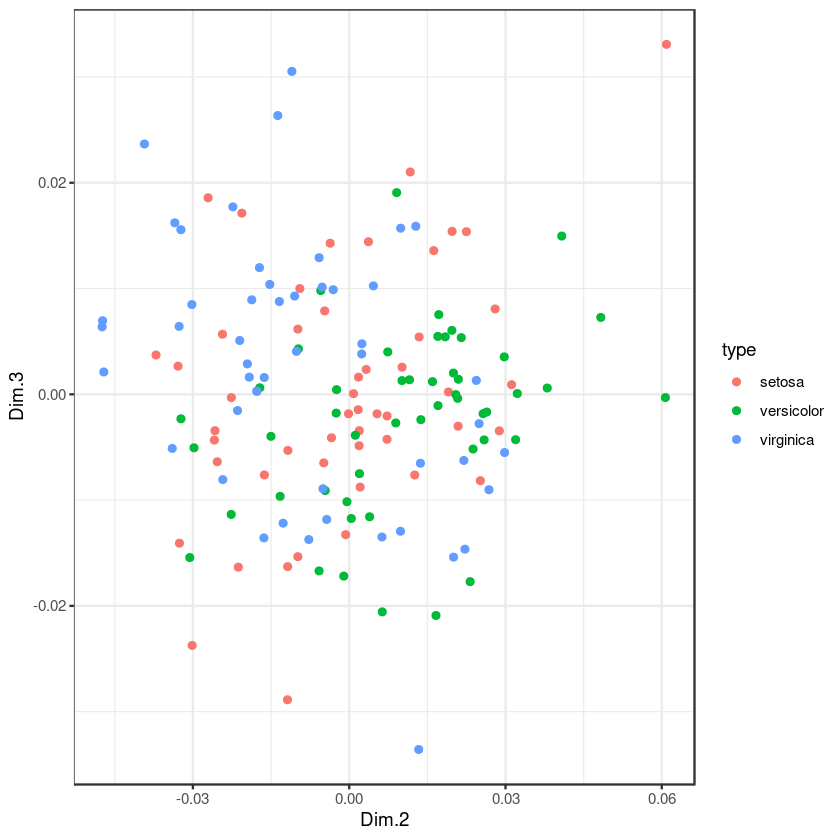

In [21]:
# 画出每个点的位置，使用前几个PC
library(ggplot2)

df=as.data.frame(ind3$coord)
df$type=iris[,5]

ggplot(df, aes(Dim.1, Dim.2, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.1, Dim.3, color=type) )+geom_point() + theme_bw()
ggplot(df, aes(Dim.2, Dim.3, color=type) )+geom_point() + theme_bw()